HIII! Me again practicing ML. This time with the Scikit Learn dataset called load_wine. 

This dataset is a 3-class classification problem with 13 features per wine sample.

In [9]:
#Import
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

#Load dataset
wine = load_wine()
X, y = wine.data, wine.target

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (178, 13)
Shape of y: (178,)


In [10]:
#Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#One-hot encode target (3 classes)
y_train_cat = to_categorical(y_train, num_classes=3)
y_test_cat = to_categorical(y_test, num_classes=3)

In [11]:
#Build the neural network
model = Sequential([
    Input(shape=(13,)),
    Dense(32, activation="relu"),
    Dense(16, activation="relu"),
    Dense(3, activation="softmax")
])

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])


In [14]:
#Train
history = model.fit(X_train, y_train_cat, epochs=100, validation_split=0.2, verbose=0)

In [15]:
#Evaluate
loss, acc = model.evaluate(X_test, y_test_cat, verbose=0)
print(f"Test accuracy: {acc:.3f}")

Test accuracy: 0.944


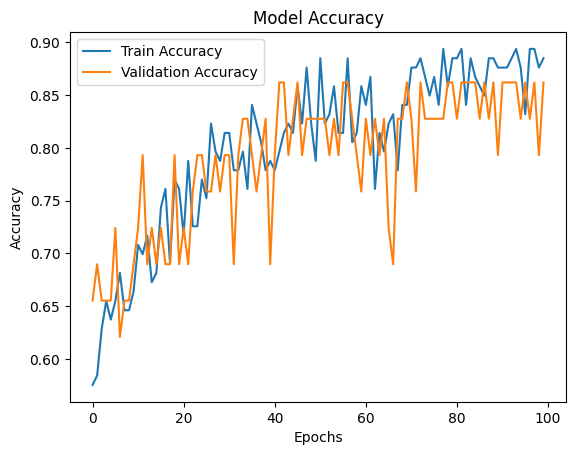

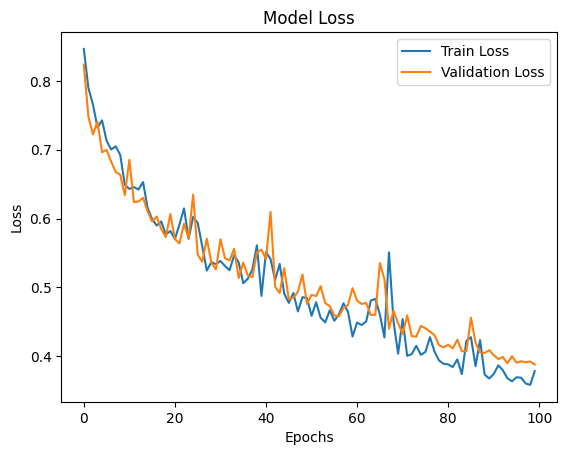

In [16]:
#Plot

import matplotlib.pyplot as plt

#Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()

#Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.show()